In [ ]:
import sys
import os
from pathlib import Path
from dotenv import load_dotenv

working_dir = Path.cwd()
while working_dir.name != 'CausalMTR-BC':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'CausalMTR-BC' not found")
os.chdir(working_dir)

# Load env variables from config/.env 
dotenv_path = Path("configs/.env")
load_dotenv(dotenv_path=dotenv_path)

# GPUDRIVE_PATH = os.environ.get("GPUDRIVE_PATH")
# sys.path.append(os.path.abspath(GPUDRIVE_PATH))

from gpudrive.env.config import EnvConfig, SceneConfig
from gpudrive.env.env_torch import GPUDriveTorchEnv
from gpudrive.visualize.utils import img_from_fig
from gpudrive.env.dataset import SceneDataLoader

In [2]:
%matplotlib inline

In [2]:
import importlib

from CMTR.mtr.config import cfg_from_list
# from CMTR.mtr.datasets.dataset import DatasetTemplate
from CMTR.mtr.datasets.waymo.waymo_dataset import WaymoDataset
# from CMTR.mtr.models.context_encoder import MTREncoder
import yaml 
from easydict import EasyDict
import logging
import torch
import numpy as np

# import CMTR.mtr.datasets.waymo.waymo_dataset
# importlib.reload(CMTR.mtr.datasets.waymo.waymo_dataset)
# from CMTR.mtr.datasets.waymo.waymo_dataset import WaymoDataset

In [ ]:
def getconfig(cfg_file):
    with open(cfg_file, 'r') as f:
        try:
            config = yaml.load(f, Loader=yaml.FullLoader)
        except:
            config = yaml.load(f)

    return EasyDict(config)

logger = logging.getLogger(__name__)

config = getconfig("configs/config.yaml")
waymo_dataset = WaymoDataset(config.DATA_CONFIG, test_mode=1, logger=logger)

In [ ]:

DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
DATA_PATH = "data/processed/examples" # Your data path
MAX_NUM_OBJECTS = 64
NUM_ENVS = 2
DEVICE = "cuda:1"

# Configs
env_config = EnvConfig(dynamics_model=DYNAMICS_MODEL)

In [ ]:
# Make dataloader
data_loader = SceneDataLoader(
    root="gpudrive/data/processed/examples", # Path to the dataset
    batch_size=NUM_ENVS, # Batch size, you want this to be equal to the number of worlds (envs) so that every world receives a different scene
    dataset_size=NUM_ENVS, # Total number of different scenes we want to use
    sample_with_replacement=False, 
    seed=42, 
    shuffle=True,   
)

print("Making the environment")

# Make environment
env = GPUDriveTorchEnv(
    config=env_config,
    data_loader=data_loader,
    max_cont_agents=MAX_NUM_OBJECTS, # Maximum number of agents to control per scenario
    device="cuda", 
    action_type="continuous" # "continuous" or "discrete"
)

: 

In [25]:
import dev
import dev.imitation_data_generation
from dev.imitation_data_generation import generate_state_action_pairs

In [26]:
'''
Generating state-action pairs: Part of the dataloader
'''
infos = generate_state_action_pairs(env=env,
                            device="cuda",
                            action_space_type="continuous", 
                            use_action_indices=True,  
                            make_video=False,
                            render_index=[2, 0],
                            save_path="use_discr_actions_fix",
                            CMTR=True, 
                            waymo_dataset=waymo_dataset,
                            prior_frame=40,
                            future_frame=40
) 

In [27]:
'''
Validate the observation dictionaries returned by generate_state_action_pairs
'''
import CMTR
importlib.reload(CMTR)
import CMTR
from CMTR.mtr.utils.plot.scenario import plot_scenario
import matplotlib.pyplot as plt
from IPython.display import display

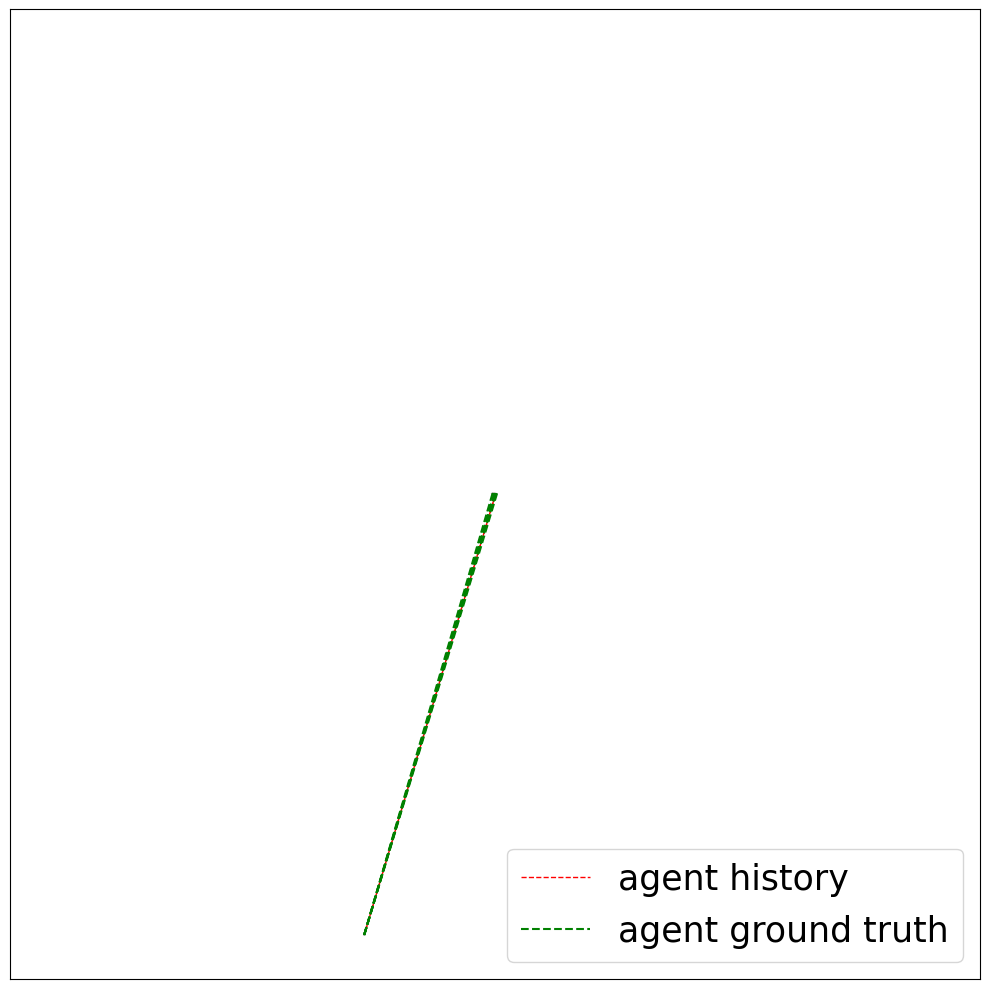

In [28]:
fig = plot_scenario(
    input_dict=waymo_dataset.create_scene_level_data(None, infos),
    forward_ret_dict=None,
    num_samples=1,
    plot_object_history=True, 
    plot_object_gt_future=True,
    # every arg that follows this is about plotting the model's output: false
)

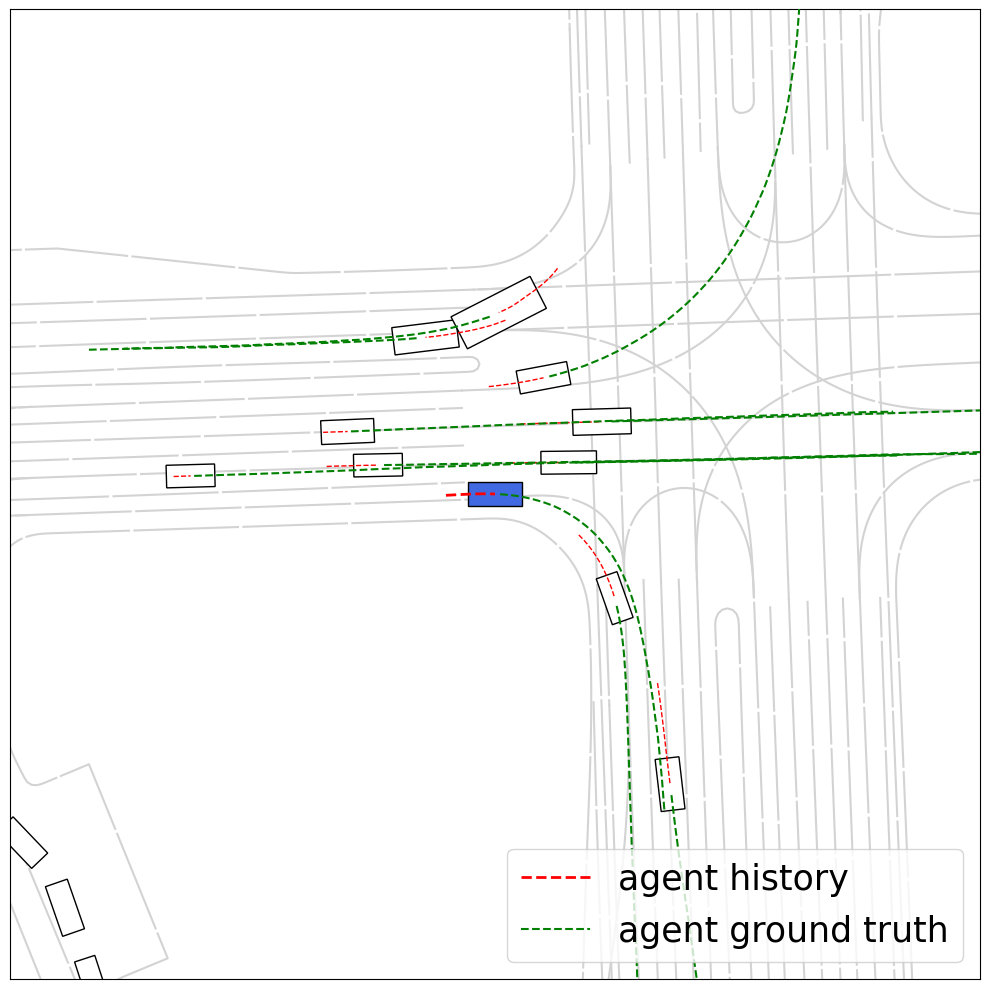

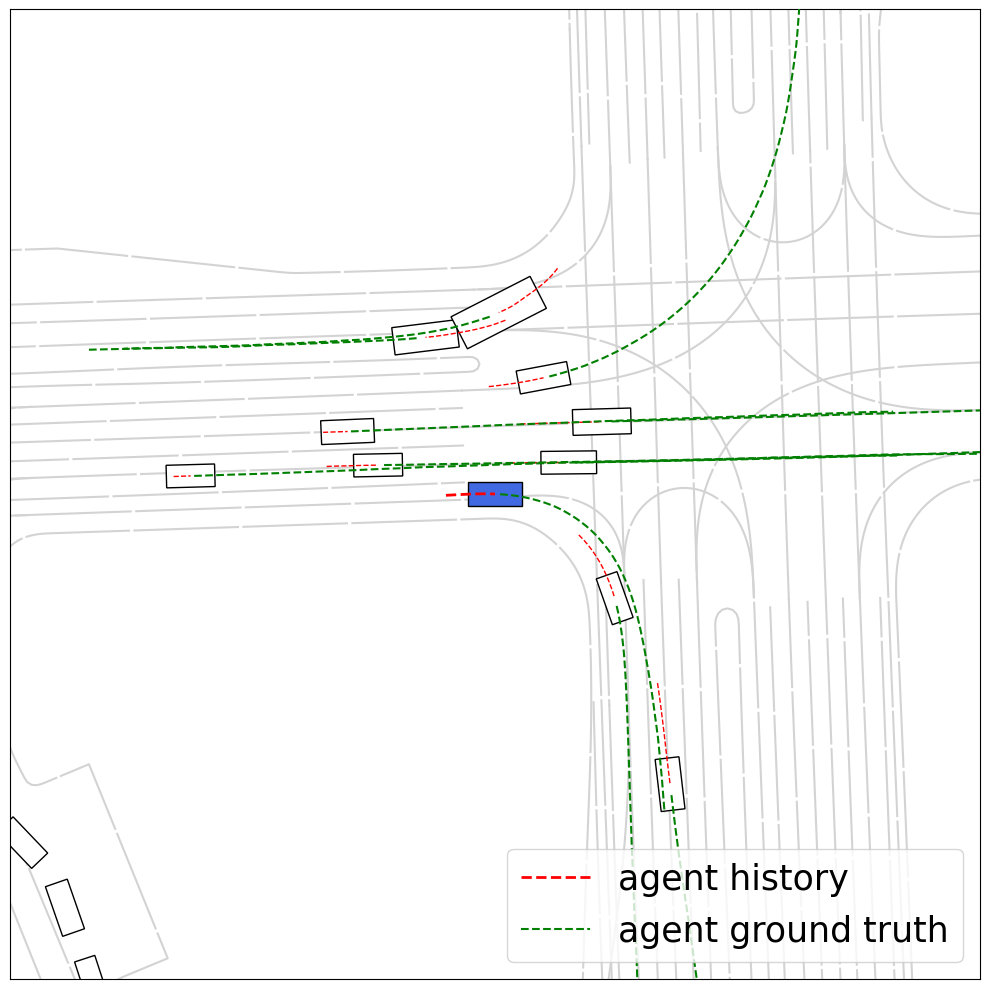

In [29]:
plot_scenario(
    input_dict=waymo_dataset.create_scene_level_data(0, None),
    forward_ret_dict=None,
    num_samples=1,
    plot_object_history=True, 
    plot_object_gt_future=True,

)

In [33]:
import pickle
info = waymo_dataset.infos[0]
scene_id = info['scenario_id']
with open(waymo_dataset.data_path / f'sample_{scene_id}.pkl', 'rb') as f:
    info = pickle.load(f)

In [34]:
info['track_infos']['trajs'].shape

(33, 91, 10)

In [35]:
pred_info = generate_state_action_pairs(env=env,
                            device="cuda",
                            action_space_type="continuous", 
                            use_action_indices=True,  
                            make_video=False,
                            render_index=[2, 0],
                            save_path="use_discr_actions_fix",
                            CMTR=True, 
                            waymo_dataset=waymo_dataset,
                            prior_frame=40,
                            future_frame=40
)

In [36]:
print("Real info:\n")
for i in info: 
    print(i)

print()

print("Our infos:\n")
for i in pred_info:
    print(i)

Real info:

track_infos
dynamic_map_infos
map_infos
scenario_id
timestamps_seconds
current_time_index
sdc_track_index
objects_of_interest
tracks_to_predict

Our infos:

scenario_id
timestamps_seconds
current_time_index
sdc_track_index
objects_of_interest
tracks_to_predict
track_infos
dynamic_map_infos
map_infos


In [37]:
info['scenario_id']

'101d77f96894896a'

In [38]:
pred_info['scenario_id']

'0'

In [129]:
info['timestamps_seconds']

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0]

In [130]:
pred_info['timestamps_seconds']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ])

In [106]:
info['current_time_index']

10

In [107]:
pred_info['current_time_index']

10

In [108]:
info['objects_of_interest']

[]

In [109]:
pred_info['objects_of_interest']

[]

In [115]:
info['tracks_to_predict']

{'track_index': [0, 11, 4],
 'difficulty': [0, 0, 0],
 'object_type': ['TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE']}

In [131]:
pred_info['tracks_to_predict']

{'track_index': array([ 1,  3,  7, 15, 16, 21, 36, 46]),
 'difficulty': None,
 'object_type': array(['TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
        'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE'],
       dtype='<U12')}

In [135]:
len(info['track_infos']['object_id'])

33

In [136]:
len(pred_info['track_infos']['object_id'])

47

In [148]:
info['track_infos']['object_type']

['TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE',
 'TYPE_VEHICLE']

In [142]:
pred_info['track_infos']['object_type']

array(['TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE',
       'TYPE_VEHICLE', 'TYPE_VEHICLE', 'TYPE_VEHICLE'], dtype='<U12')

In [151]:
info['track_infos']['trajs'].shape

(33, 91, 10)

In [150]:
pred_info['track_infos']['trajs'].shape

(47, 91, 10)

In [41]:
def plot_info_traj(trajs, first=0, last=70): 

    pos = trajs[:, first, :2]
    pos = pos[(pos[..., 0] < 1000) & (pos[..., 0] > -1000)]
    plt.scatter(pos[..., 0], pos[..., 1], c='r')
    pos = trajs[:, last, :2]
    pos = pos[(pos[..., 0] < 1000) & (pos[..., 0] > -1000)]
    plt.scatter(pos[..., 0], pos[..., 1], c='b')
    return pos

array([[  0.     ,   0.     ],
       [341.69827, 444.7502 ],
       [345.6528 , 456.94406],
       [  0.     ,   0.     ],
       [383.08746, 454.38583],
       [  0.     ,   0.     ],
       [341.75238, 426.99203],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [341.77744, 456.7896 ],
       [358.02216, 432.27478],
       [302.94205, 342.3985 ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ],
       [353.93973, 393.0452 ],
       [409.30737, 387.24237],
       [354.14825, 367.43887],
       [  0.     ,   0.     ],
       [296.80054, 348.92365],
       [353.3743 , 343.76874],
       [359.09348, 341.88092],
       [318.12344, 321.9274 ],
       [  0.     ,   0.     ],
       [299.20804, 388.21964],
       [

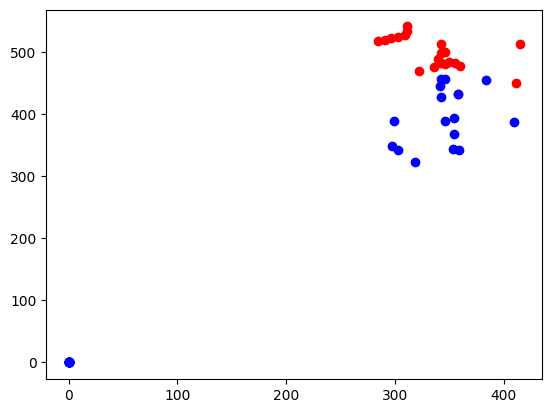

In [42]:
plot_info_traj(info['track_infos']['trajs'])

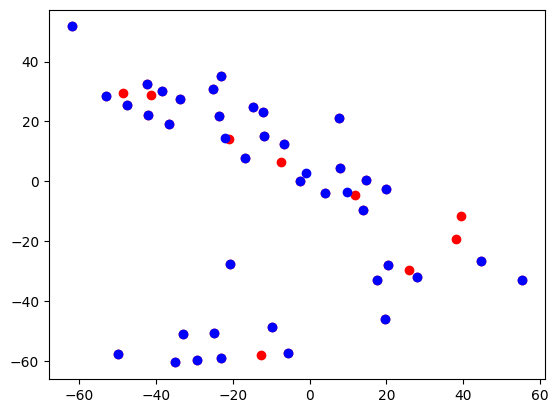

In [43]:
pos = plot_info_traj(pred_info['track_infos']['trajs'])

In [44]:
info['map_infos']['all_polylines'].shape

(33458, 7)

In [45]:
pred_info['map_infos']['all_polylines'].shape

(470, 7)

In [49]:
def plot_polylines(all_polylines): 
    x = all_polylines[:, 0]
    y = all_polylines[:, 1]
    dx = all_polylines[:, 3]
    dy = all_polylines[:, 4]
    plt.scatter(x, y)

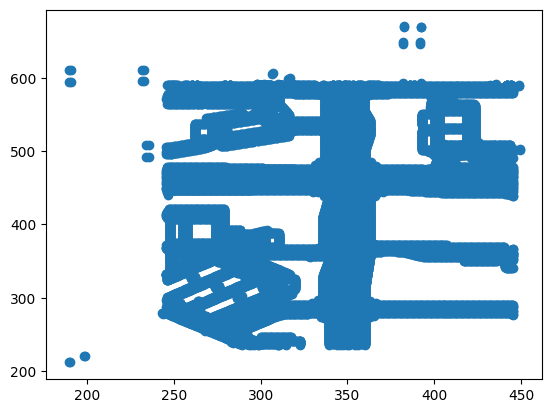

In [51]:
plot_polylines(info['map_infos']['all_polylines'])

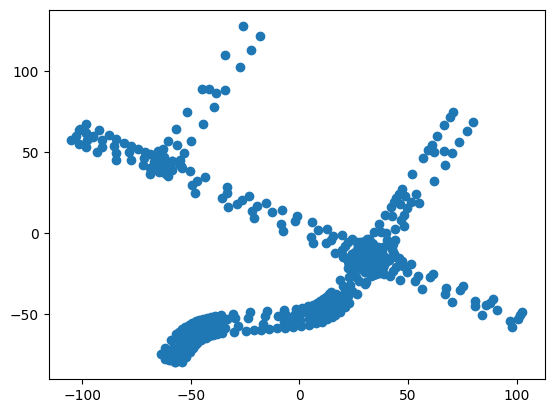

In [50]:
plot_polylines(pred_info['map_infos']['all_polylines'])

In [52]:
info['map_infos']['all_polylines'][..., -1][-500:]

array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15

In [53]:
pred_info['map_infos']['all_polylines'][..., -1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 3.

(array([8127., 1595.,  351.,  568., 5968., 6122.,  528.,  349., 1779.,
        8071.]),
 array([-1.        , -0.80000001, -0.60000002, -0.39999998, -0.19999999,
         0.        ,  0.20000005,  0.39999998,  0.60000002,  0.80000007,
         0.99999994]),
 <BarContainer object of 10 artists>)

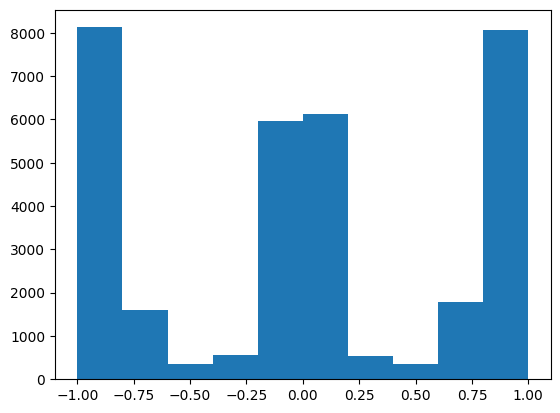

In [55]:
plt.hist(info['map_infos']['all_polylines'][..., 3])

(array([6.0100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 6.0000e+00, 5.0000e+00, 7.0000e+00, 3.2839e+04]),
 array([0.        , 0.10000001, 0.20000002, 0.30000001, 0.40000004,
        0.50000006, 0.60000002, 0.70000005, 0.80000007, 0.9000001 ,
        1.00000012]),
 <BarContainer object of 10 artists>)

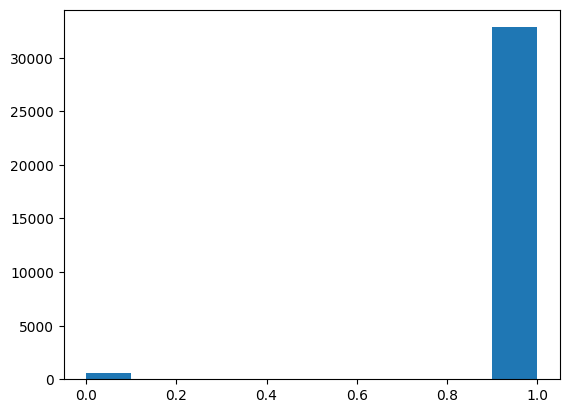

In [58]:
plt.hist(info['map_infos']['all_polylines'][..., 3]**2 + info['map_infos']['all_polylines'][..., 4]**2)

In [ ]:
def plot_agent_map(trajs, all_polylines, time_index=10): 
    pos = trajs[:, time_index, :2]
    pos = pos[(pos[..., 0] < 1000) & (pos[..., 0] > -1000)]
    plt.scatter(pos[..., 0], pos[..., 1])
    x = all_polylines[:, 0]
    y = all_polylines[:, 1]
    plt.scatter(x, y)

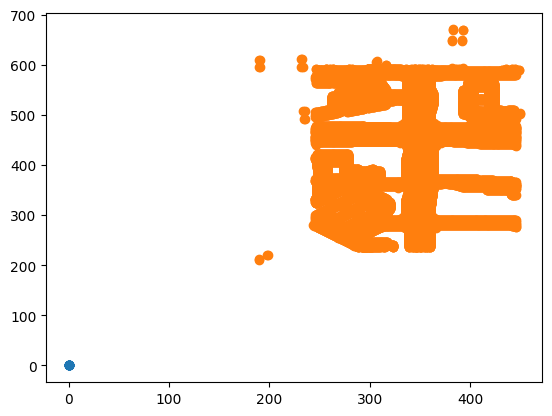

In [258]:
plot_agent_map(info['track_infos']['trajs'], info['map_infos']['all_polylines'])

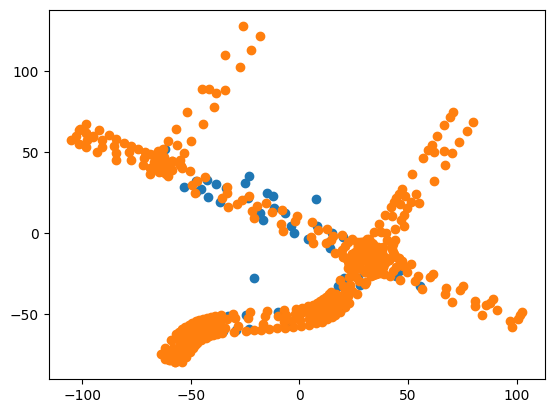

In [259]:
plot_agent_map(pred_info['track_infos']['trajs'], pred_info['map_infos']['all_polylines'])

/Research/CMTR/mtr/utils/plot/scenario.py:338: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=25)


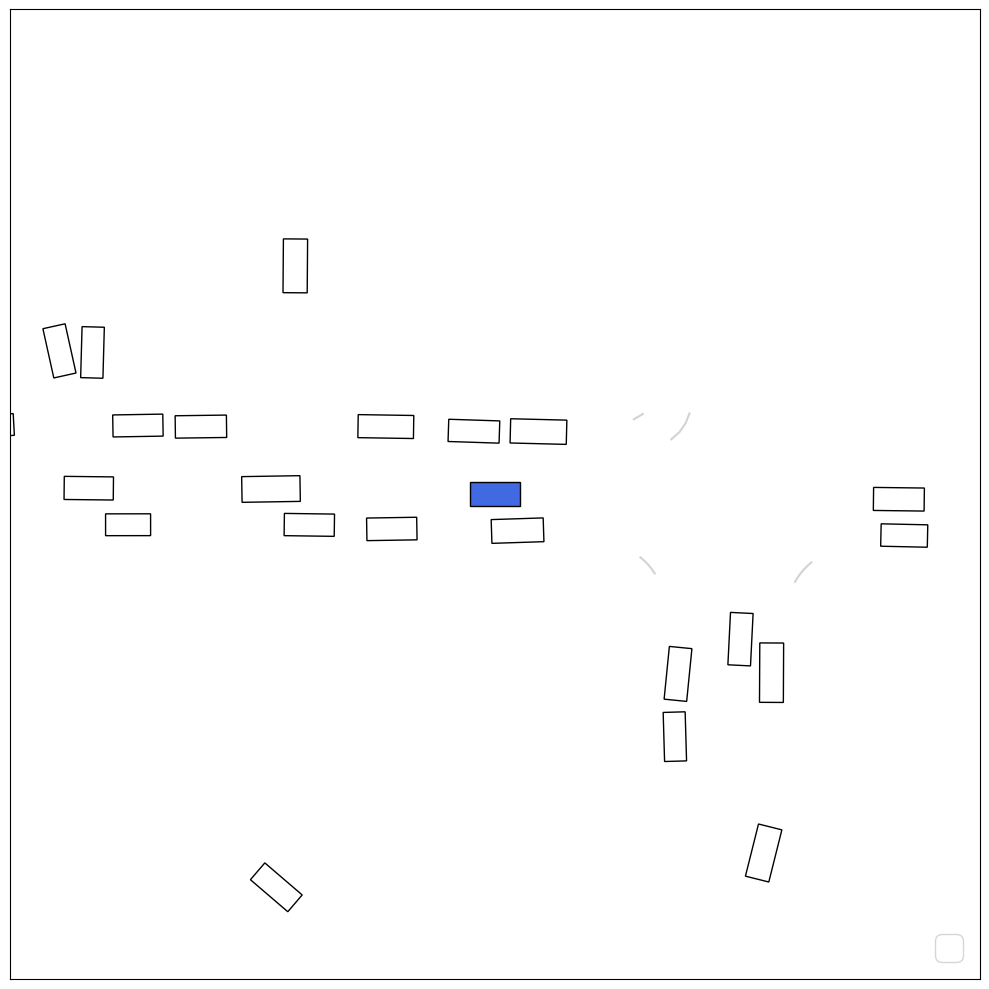

In [61]:
pred_info_dict = waymo_dataset.create_scene_level_data(None, pred_info)
true_info_dict = waymo_dataset.create_scene_level_data(0, None)
fig = plot_scenario(
    input_dict=pred_info_dict,
    forward_ret_dict=None,
    num_samples=1,
    plot_object_history=False, 
    plot_object_gt_future=False,
    # every arg that follows this is about plotting the model's output: false
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap, Normalize, colorConverter

from mtr.utils.common_utils import to_numpy

road_color = 'lightgrey'
ego_agent_line_color = 'black'
ego_agent_face_color = 'royalblue'
other_agent_line_color = 'black'
other_agent_face_color = 'white'
history_color = 'red'
gt_future_color = 'green'
pred_future_color = 'orange'
attn_color = 'red'

road_z_order = 1
obj_z_order = 2
traj_z_order = 3

road_attn_cmap = LinearSegmentedColormap.from_list("", [(0, road_color), (1, attn_color)])
obj_attn_cmap = LinearSegmentedColormap.from_list("", [(0, other_agent_face_color), (1, attn_color)])
transparent = colorConverter.to_rgba('white', alpha=0)
gmm_prob_cmap = LinearSegmentedColormap.from_list("", [(0, transparent), (1, pred_future_color)])

def waymo_polyline_plot(input_dict, i=0): 
    map_polylines = input_dict['map_polylines'][i]
    map_polylines_mask = input_dict['map_polylines_mask'][i]

    for map_polyline_j, map_polyline_j_mask in zip(map_polylines, map_polylines_mask):
        map_polyline_j = map_polyline_j[map_polyline_j_mask]
        plt.plot(map_polyline_j[:, 0], map_polyline_j[:, 1], c='r')

def waymo_current_loc(input_dict, i=0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ego_agent_idx = input_dict['track_index_to_predict'][i]
    obj_history_mask = input_dict['obj_trajs_mask'][i].astype(bool)
    obj_current_pos = input_dict['obj_trajs_last_pos'][i]
    obj_size = input_dict['obj_trajs'][i][:, -1, 3:5]
    obj_head_sin = input_dict['obj_trajs'][i][:, -1, 23]
    obj_head_cos = input_dict['obj_trajs'][i][:, -1, 24]

    obj_mask = obj_history_mask[:, -1]

    # compute box location and angle
    obj_heading = np.arctan2(obj_head_sin, obj_head_cos)

    half_length = obj_size[:, 0] / 2
    half_width = obj_size[:, 1] / 2
    rectangle_x = obj_current_pos[:, 0] - half_length * obj_head_cos + half_width * obj_head_sin
    rectangle_y = obj_current_pos[:, 1] - half_length * obj_head_sin - half_width * obj_head_cos

    # adjust color based on attn score
    obj_colors = [other_agent_face_color] * len(obj_mask)
    obj_colors[ego_agent_idx] = ego_agent_face_color

    for j, (obj_x_j, obj_y_j, obj_mask_j, obj_size_j, obj_heading_j, obj_face_color_j) in \
            enumerate(zip(rectangle_x, rectangle_y, obj_mask, obj_size, obj_heading, obj_colors)):
        if not obj_mask_j:
            continue

        if j == ego_agent_idx:
            edge_color = ego_agent_line_color
            obj_face_color_j = ego_agent_face_color
            linewidth = 1
        else:
            edge_color = other_agent_line_color
            linewidth = 1
        ax.add_patch(Rectangle((obj_x_j, obj_y_j),
                                obj_size_j[0], obj_size_j[1],
                                angle=np.rad2deg(obj_heading_j),
                                edgecolor=edge_color,
                                linewidth=linewidth,
                                facecolor=obj_face_color_j,
                                zorder=obj_z_order))
    ax.set_aspect('equal', adjustable='box')

    # if plot_map_attn:
    #     plt.colorbar(plt.cm.ScalarMappable(cmap=road_attn_cmap, norm=attn_to_map_norm),
    #                  label='attention to map', ax=ax)
    #
    # if plot_obj_attn:
    #     plt.colorbar(plt.cm.ScalarMappable(cmap=obj_attn_cmap, norm=attn_to_obj_norm),
    #                  label='attention to agents', ax=ax)
    #
    # if plot_ego_object_pred_future and plot_gmm_mode == "gmm_prob":
    #     plt.colorbar(plt.cm.ScalarMappable(cmap=gmm_prob_cmap, norm=gmm_prob_norm), label='gmm prob', ax=ax)

    # plt.title(f'min ADE: {ade.min():.2f}', fontsize=25)
    plt.legend(loc='lower right', fontsize=25)
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)

    plt.tight_layout()



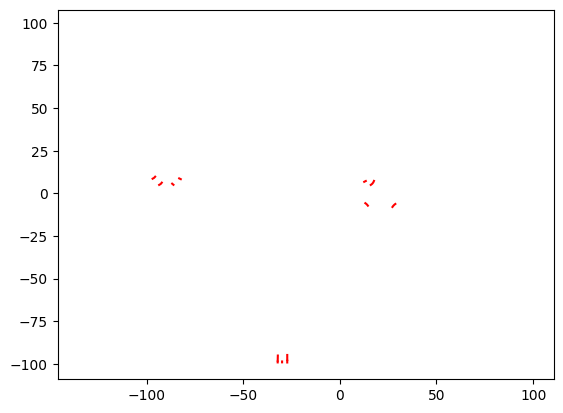

In [63]:
waymo_polyline_plot(pred_info_dict)

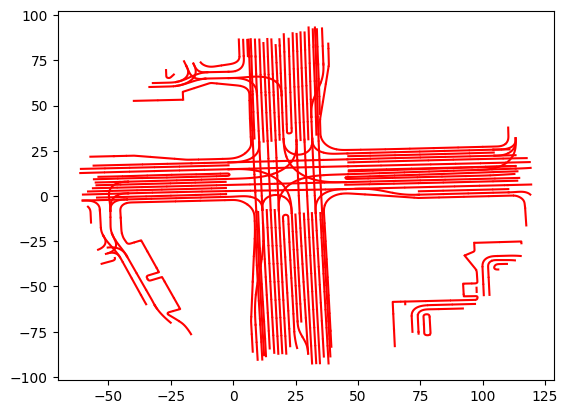

In [64]:
waymo_polyline_plot(true_info_dict)

In [ ]:
print(pred_info_dict['map_polylines_mask'].shape, pred_info_dict['map_polylines'].shape)

(8, 434, 20) (8, 434, 20, 9)


In [86]:
pred_polyline_mask = pred_info_dict['map_polylines_mask'][0]
pred_polyline_masked = pred_info_dict['map_polylines'][0][pred_polyline_mask]

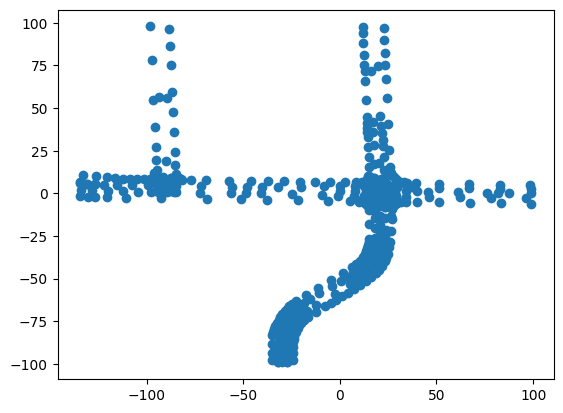

In [ ]:
new_mask = pred_polyline_masked[:, 0] < 10000
plt.scatter(pred_polyline_masked[:, 0][new_mask], pred_polyline_masked[:, 1][new_mask])

In [97]:
pred_info_dict['obj_trajs_last_pos'].shape

(8, 47, 3)

Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (3, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (2, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)


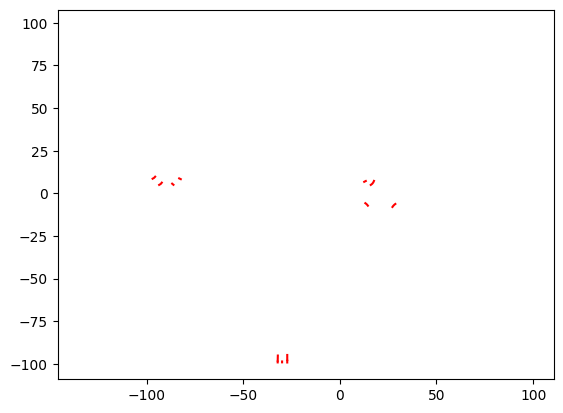

In [103]:
map_polylines = pred_info_dict['map_polylines'][0]
map_polylines_mask = pred_info_dict['map_polylines_mask'][0]
count = 0 
for map_polyline_j, map_polyline_j_mask in zip(map_polylines, map_polylines_mask):
    print(f"Pre: {map_polyline_j.shape}")
    map_polyline_j = map_polyline_j[map_polyline_j_mask]
    print(f"Pro: {map_polyline_j.shape}")
    plt.plot(map_polyline_j[:, 0], map_polyline_j[:, 1], c='r')

In [116]:
import dev
import dev.imitation_data_generation 

importlib.reload(dev)
importlib.reload(dev.imitation_data_generation)

from dev.imitation_data_generation import generate_state_action_pairs

pred_info = generate_state_action_pairs(env=env,
                            device="cuda",
                            action_space_type="continuous", 
                            use_action_indices=True,  
                            make_video=False,
                            render_index=[2, 0],
                            save_path="use_discr_actions_fix",
                            CMTR=True, 
                            waymo_dataset=waymo_dataset,
                            prior_frame=40,
                            future_frame=40
)

In [126]:
pred_info['map_infos']['all_polylines'][:, 3]**2 + pred_info['map_infos']['all_polylines'][:, 4]**2

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.0000001 , 1.0000001 , 1.0000001 , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.0000001 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.     

In [119]:
from gpudrive.datatypes.roadgraph import GlobalRoadGraphPoints
roadgraph = GlobalRoadGraphPoints.from_tensor(
    roadgraph_tensor=env.sim.map_observation_tensor(),
    backend=env.backend,
    device=env.device,
)

orientations = roadgraph.orientation[0]

In [120]:
orientations.shape

torch.Size([10000])

(array([1.240e+02, 3.300e+01, 7.400e+01, 8.000e+00, 7.000e+00, 6.000e+00,
        1.400e+01, 6.400e+01, 2.500e+01, 9.645e+03]),
 array([-0.99775368, -0.79797828, -0.59820294, -0.39842755, -0.19865221,
         0.00112313,  0.20089859,  0.40067393,  0.60044926,  0.8002246 ,
         1.        ]),
 <BarContainer object of 10 artists>)

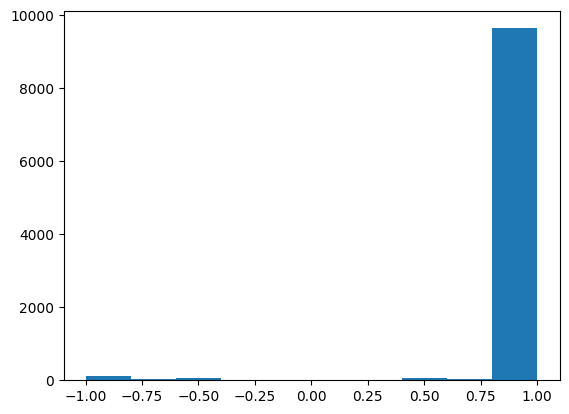

In [124]:
plt.hist(torch.cos(orientations.cpu()))

Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (3, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (2, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)
Pre: (20, 9)
Pro: (1, 9)


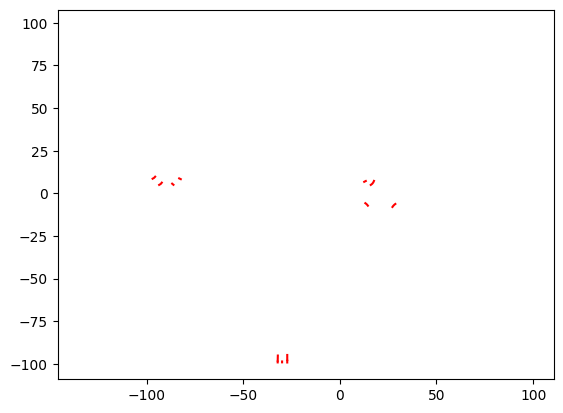

In [127]:
pred_info_dict = waymo_dataset.create_scene_level_data(None, pred_info)

map_polylines = pred_info_dict['map_polylines'][0]
map_polylines_mask = pred_info_dict['map_polylines_mask'][0]
count = 0 
for map_polyline_j, map_polyline_j_mask in zip(map_polylines, map_polylines_mask):
    print(f"Pre: {map_polyline_j.shape}")
    map_polyline_j = map_polyline_j[map_polyline_j_mask]
    print(f"Pro: {map_polyline_j.shape}")
    plt.plot(map_polyline_j[:, 0], map_polyline_j[:, 1], c='r')

In [129]:
pred_info_dict['map_polylines'].shape

(8, 434, 20, 9)